#HW4


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

### Enviroment
1. Episode task, $\gamma$ =1, $\alpha$=0.1, $\epsilon$=0.3
2. r=-100 if moves into the swamps; all other transitions yield r=-1
3. Use 30 simulation runs to estimate the average value 
4. Environment size is 10x5 
5. $S_0$ is (0, 3) and $S_T$ is (9,3) 

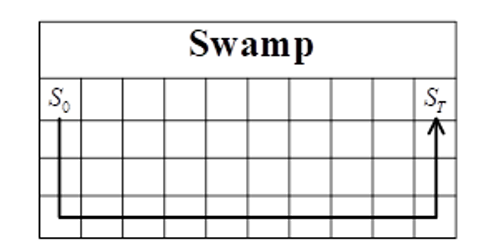

In [3]:
# left, up, right, down
ACTIONS = [np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0]),
           np.array([0, -1])]


In [4]:
def step(state, action):
  state_n = (state + action).tolist()
  if state_n[0] < 0 or state_n[0] >= 10  or state_n[1] < 0 or state_n[1] >= 5:
    state_n = state
  if state_n[1] == 4:
    reward = -100
  else:
    reward = -1

  return state_n, reward


In [5]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(10):
    for j in range(5):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[i][4-j])
      if data[i][4-j][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[i][4-j][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[i][4-j][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[i][4-j][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.2f' %data[i][4-j][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[i][4-j][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[i][4-j][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[i][4-j][3], verticalalignment='center', horizontalalignment='center')
  #from google.colab import files #google.colab only
  
  plt.savefig("3.png")
  #files.download("3.png") #google.colab only

In [89]:
def sarsa():
 
  returns = []
  q_value = rd.random([10,5,4])
  #St
  q_value[9][3] = 0
  epsilon = 0.3
  discount = 1
  alpha = 0.1
  ST = [9,3]
  epis = 2000
  
######## YOUR CODE HERE ########
  
  for _ in range(epis):
    total_reward = 0
    state = [0,3]
    action = -1
    if rd.random() < epsilon:
      action = rd.randint(0,4)
    else:
      action = np.argmax(q_value[state[0]][state[1]])
    while state != ST:
      next_state,reward = step(state,ACTIONS[action])
      #choose action-greedy from next_state
      next_action = -1
      if rd.random() < epsilon:
        next_action = rd.randint(0,4)
      else:
        next_action = np.argmax(q_value[next_state[0]][next_state[1]])
      q_value[state[0]][state[1]][action] += alpha * (reward + discount * q_value[next_state[0]][next_state[1]][next_action] - q_value[state[0]][state[1]][action])
      state = next_state
      action = next_action
      total_reward += reward
    returns.append(total_reward)
    
####################################
  
    
  return returns,q_value

In [16]:
def Q_learning():

######## YOUR CODE HERE ########  
  returns = []
  q_value = rd.rand(10, 5, len(ACTIONS))
  #St
  q_value[9][3] = 0
  epsilon = 0.3
  discount = 1
  learning_rate = 0.1
  ST = [9,3]
  epis = 2000
  for _ in range(epis):
    total_reward = 0
    state = [0,3]
    num = 0
    while(state != ST):    
      if rd.rand() < epsilon:
        action = rd.randint(0,4)
      else:
        action = np.argmax(q_value[state[0],state[1]])
      next_state,reward = step(state,ACTIONS[action])
      q_value[state[0],state[1],action] = q_value[state[0],state[1],action] + learning_rate * (reward + discount * np.max(q_value[next_state[0],next_state[1]]) - q_value[state[0],state[1],action])
      total_reward += reward
      state = next_state
    returns.append(total_reward)
####################################
    
  return returns,q_value

In [7]:
def get_trajactory(state,q_value):
  tra = []
  while state != [9,3]:
    if rd.rand() < 0.3:
      action = rd.randint(0,4)
    else:
      action = np.argmax(q_value[state[0],state[1]])
    #print(action)
    state_,reward=step(state,ACTIONS[action])
    tra.append([state,action,reward])
    state = state_
    
  return tra


In [ ]:
k = [1,2]
j = np.array([k])
print(np.array([5,3]))
print(k)
print(j)
print(type(j))
print(type(k))

[5 3]
[1, 2]
[[1 2]]
<class 'numpy.ndarray'>
<class 'list'>


In [90]:
def first_visit_MC_control(epis):
  
  q_value = rd.rand(10, 5, len(ACTIONS))
  q_value[9][3] = 0
  everytimes_reward = []

  for z in range(epis):
    #until to ST
    tra =[]
    state = [0,3]
    G = 0
    key = 0
    #print("number",z,q_value)
   
    tra = get_trajactory(state,q_value)
     
      
    #new_q_value = np.array(q_value)#別設定0阿~~~~~
    plot_reward = 0
    for i in range(len(tra)-1,-1,-1):
      plot_reward += tra[i][2]
      iterate = 0
      G = tra[i][2] + 1 * G
      for j in range(i):
        if tra[i][0] == tra[j][0]:
          iterate = 1
      if i == 0 or iterate == 0:
        q_value[tra[i][0][0],tra[i][0][1],tra[i][1]] = q_value[tra[i][0][0],tra[i][0][1],tra[i][1]] + 0.1 * (G - q_value[tra[i][0][0],tra[i][0][1],tra[i][1]])
    everytimes_reward.append(plot_reward)
    
   
  return everytimes_reward

In [91]:
def every_visit_MC_control(epis):
  q_value = rd.rand(10, 5, len(ACTIONS))
  q_value[9][3] = 0
  everytimes_reward = []
  for _ in range(epis):
    #until to ST
    tra =[]
    state = [0,3]
    
    key = 0
    
    tra = get_trajactory(state,q_value)
      
     
    plot_reward = 0
    for i in range(0,len(tra)):
      plot_reward += tra[i][2]
      G = 0
      for j in range(len(tra)-1,i-1,-1):
        G = tra[j][2] + 1 * G
      q_value[tra[i][0][0],tra[i][0][1],tra[i][1]] = q_value[tra[i][0][0],tra[i][0][1],tra[i][1]] + 0.1 * (G - q_value[tra[i][0][0],tra[i][0][1],tra[i][1]])
    everytimes_reward.append(plot_reward)
        
  return everytimes_reward

# Result(60%):

Average 30 simulation, 2000 episode per simulation.

In [92]:
def averages(a):
  
  return np.array([np.average(a[:i+1]) for i in range(len(a))])

In [ ]:
#numpy compare
a = [1,2,3]

k = []
j = []

k.append(averages(a))
j.append(np.array([5]))
z = np.array([3])
print(j)
print(k)
print(z)
print(np.array([5,3]))

[array([5])]
[array([1. , 1.5, 2. ])]
[3]
[5 3]


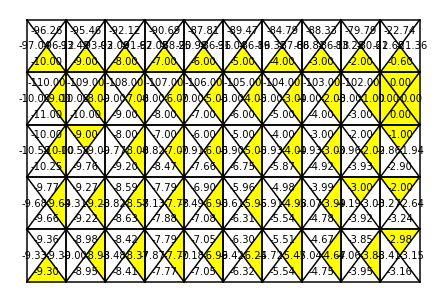

In [93]:
plot_reward_q = []
q_value_total_q = np.zeros([10,5,4])
for i in range(30):
  reward_q,q_value_q = Q_learning()
  plot_reward_q.append(averages(reward_q))
  q_value_total_q += q_value_q
q_value_total_q /= 30
drawTable(q_value_total_q)

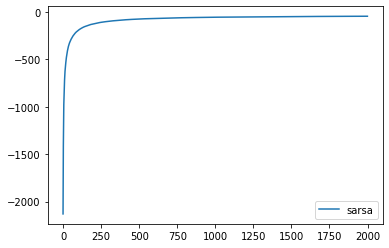

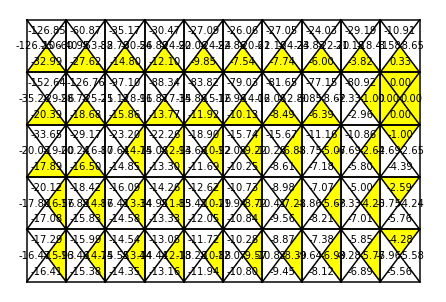

In [94]:
plot_reward_s = []
q_value_total_s = np.zeros([10,5,4])
for i in range(30):
  reward_s,q_value_s = sarsa()
  plot_reward_s.append(averages(reward_s))
  q_value_total_s += q_value_s
q_value_total_s /= 30
plt.plot(np.average(plot_reward_s,axis = 0),label = "sarsa")

plt.legend()
plt.show()
drawTable(q_value_total_s)

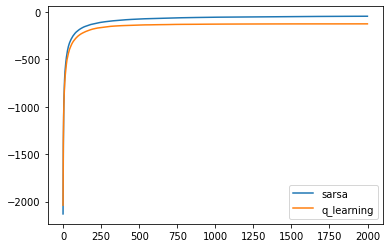

In [95]:
plt.plot(np.average(plot_reward_s,axis = 0),label = "sarsa")
#plt.plot(np.average(plot_sarsa_reward,axis=0),label='sarsa')
plt.plot(np.average(plot_reward_q,axis = 0),label = "q_learning")
#plt.ylim(-500, 0)
plt.legend()
plt.show()

simulation:  0
simulation:  1
simulation:  2
simulation:  3
simulation:  4
simulation:  5
simulation:  6
simulation:  7
simulation:  8
simulation:  9
simulation:  10
simulation:  11
simulation:  12
simulation:  13
simulation:  14
simulation:  15
simulation:  16
simulation:  17
simulation:  18
simulation:  19
simulation:  20
simulation:  21
simulation:  22
simulation:  23
simulation:  24
simulation:  25
simulation:  26
simulation:  27
simulation:  28
simulation:  29


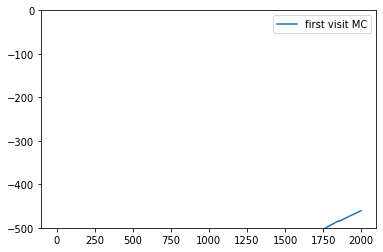

In [97]:
#first visit MC
epsode = 2000
epis_times_reward_first = []
new_epis_times_reward = []

for i in range(30): 
  new_epis_times_reward = first_visit_MC_control(epsode)
  new_epis_times_reward = np.array(new_epis_times_reward)
  epis_times_reward_first.append(averages(new_epis_times_reward))
  print("simulation: ",i)
#learning curve
plt.plot(np.average(epis_times_reward_first,axis = 0),label = "first visit MC")
plt.ylim(-500,0)
plt.legend()
plt.show()

simulation:  0
simulation:  1
simulation:  2
simulation:  3
simulation:  4
simulation:  5
simulation:  6
simulation:  7
simulation:  8
simulation:  9
simulation:  10
simulation:  11
simulation:  12
simulation:  13
simulation:  14
simulation:  15
simulation:  16
simulation:  17
simulation:  18
simulation:  19
simulation:  20
simulation:  21
simulation:  22
simulation:  23
simulation:  24
simulation:  25
simulation:  26
simulation:  27
simulation:  28
simulation:  29


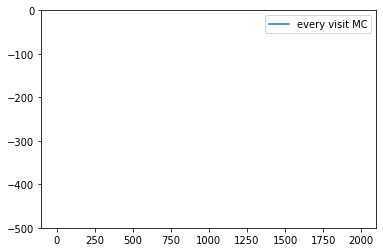

In [100]:
#every visit MC
epis_times_reward_every = []
new_epis_times_reward = []
for i in range(30): 
  new_epis_times_reward = every_visit_MC_control(epsode)
  new_epis_times_reward = np.array(new_epis_times_reward)
  epis_times_reward_every.append(averages(new_epis_times_reward))
  print("simulation: ",i) 
#learning curve

plt.plot(np.average(epis_times_reward_every,axis = 0),label = "every visit MC")
plt.ylim(-500,0)
plt.legend()
plt.show()

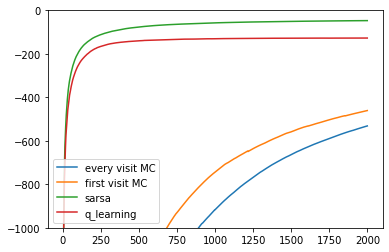

In [102]:
plt.plot(np.average(epis_times_reward_every,axis = 0),label = "every visit MC")
plt.plot(np.average(epis_times_reward_first,axis = 0),label = "first visit MC")
plt.plot(np.average(plot_reward_s,axis = 0),label = "sarsa")
plt.plot(np.average(plot_reward_q,axis = 0),label = "q_learning")
plt.ylim(-1000,0)
plt.legend()
plt.show()

#Experiments and Analysis(40%)

1. Plot the average rewards of Sarsa and Q-learning, and explain your result.(20%)
2. Plot the Q-values of Sarsa and Q-learning, and explain your result.(10%)
2. Complete Monte Carlo, and compare average rewards.(10%) 

